In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import nltk as nlp
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
dataLimit = 3000

trueNews = pd.read_csv("./data/True.csv")[:dataLimit]
fakeNews = pd.read_csv("./data/Fake.csv")[:dataLimit]

trueNews.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
trueNews['is_true'] = 1
fakeNews['is_true'] = 0

data = pd.concat([trueNews, fakeNews], ignore_index = True)
data = data.sample(frac=1).reset_index(drop=True)

data.head()

,title,text,subject,date,is_true
0,Trump Whines About Late Night Hosts Making Jo...,Donald Trump put on his tin-foil hat and raged...,News,"October 7, 2017",0
1,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
2,Trump dictated misleading statement on son's m...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"August 1, 2017",1
3,Trump Supporter Full Of Regret Because Her Un...,A woman in Indiana is feeling the pain of Dona...,News,"March 23, 2017",0
4,New Report Says Trump Destroyed Scaramucci’s ...,Donald Trump s new pick for Communications Dir...,News,"July 28, 2017",0


In [4]:
# text transformation

# remove punctuations
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

# remove stop words
#nlp.download('stopwords')
stopwords = set(nlp.corpus.stopwords.words())
def clean_stopwords(text):
    result = []
    for word in text:
        if word not in stopwords:
            result.append(word)
    return result

# lemmatization
#nlp.download('wordnet')
lemma = nlp.WordNetLemmatizer()
def lemmatize(text):
    text = [lemma.lemmatize(each) for each in text]
    return text

# proccess data 
def process_text(text):
    text = text.lower()
    text = remove_punct(text)
    text = text.split()
    text = clean_stopwords(text)
    text = lemmatize(text)
    return " ".join(text)

data['title'] = data['title'].apply(lambda x: process_text(x))
data['text'] = data['text'].apply(lambda x: process_text(x))

# create single column
data['all'] = data['title'] + " " + data['text'] + " " + data['subject']
    
data.head()

,title,text,subject,date,is_true,all
0,trump whine late night host making joke accuse...,donald trump put tinfoil raged late night tele...,News,"October 7, 2017",0,trump whine late night host making joke accuse...
1,donald trump sends embarrassing new year’s eve...,donald trump wish american happy new year leav...,News,"December 31, 2017",0,donald trump sends embarrassing new year’s eve...
2,trump dictated misleading statement son meetin...,washington reuters u president donald trump di...,politicsNews,"August 1, 2017",1,trump dictated misleading statement son meetin...
3,trump supporter full regret undocumented immig...,woman indiana feeling pain donald trump immigr...,News,"March 23, 2017",0,trump supporter full regret undocumented immig...
4,new report say trump destroyed scaramucci’s ma...,donald trump new pick communication director a...,News,"July 28, 2017",0,new report say trump destroyed scaramucci’s ma...


In [5]:
# vectorization
corpus = []
for i in range (0,data['all'].count()):
    corpus.append(data['all'][i])
count = CountVectorizer()
x = count.fit_transform(corpus).toarray()

In [6]:
values = data['is_true']

x_train, x_test, y_train, y_test = train_test_split(x, values, test_size = 0.2)

In [7]:
classifier = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, tol=0.0001, verbose=0,
                   warm_start=False, solver='lbfgs')
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

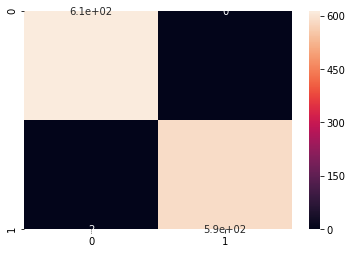

In [8]:
y_pred = classifier.predict(x_test)
confusionMatrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusionMatrix, annot = True)

In [9]:
accuracy_score(y_test, y_pred)

0.9983333333333333